"""
Created on Sun Jul 08 05:03:01 2018
@Project Title: Learning and Summarizing Graphical Models using Eigen Analysis of Graph Laplacian: An Application in Analysis of Multiple Chronic Conditions 
@Project: EAGL (Simplification Based Graph Summarization)
@author: Syed Hasib AKhter Faruqui
"""

# Sample Example

In [1]:
## Load Necessary Library
import EAGL as gc  # Graph Compression Library
from scipy import io as sc
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Setting Random Seeds for reproducibility
from numpy.random import seed
seed(123)
import os
os.environ['PYTHONHASHSEED']='0'
import random as rn
rn.seed(123)

In [2]:
# Create Random Graph
# A. L. Barabási and R. Albert “Emergence of scaling in random networks”, Science 286, pp 509-512, 1999.
G=nx.barabasi_albert_graph(10,5, seed=123)
DAG=nx.to_numpy_array(G)

## Setup 1: Single edge reduction (Method='False')

In [3]:
# Main Calculation
# Method  :'False' = Single edge reduction(Default)
#          'True'  = Multiple edge reduction

Updated_DAG,EigenValue,NumberofEdges=gc.GraphCompression(DAG,Method='False')

Enter if tree connection to be maintained (True or False): True
Enter Tree Extraction method (dfs or bfs): bfs
Enter Traversing Start Node(0 to 9):0
Enter Number of Iterations: 20
Enter for which Eigenvalue (1st or 2nd) perform the calculation: 2


In [4]:
# Print relevent Information
print('Number of Edges on the Updated DAG:',np.count_nonzero(Updated_DAG))
Percentage = np.abs(np.count_nonzero(Updated_DAG)-np.count_nonzero(DAG))/np.count_nonzero(DAG)
print('Compression:',Percentage*100,'%')

Number of Edges on the Updated DAG: 30
Compression: 40.0 %


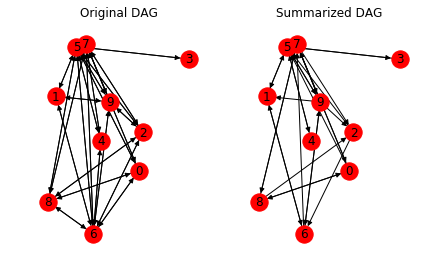

In [5]:
## Plot the Tree's
pos = nx.random_layout(nx.DiGraph(DAG))
plt.figure(1)
plt.subplot(1, 2, 1)
gc.plot_Graph(DAG,pos)
plt.title('Original DAG')
plt.subplot(1, 2, 2)
gc.plot_Graph(Updated_DAG,pos)
plt.title('Summarized DAG')
plt.tight_layout() # Fitting the plot

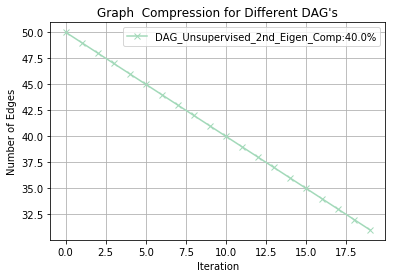

In [6]:
## Plot Number of Edges Reduced
Compression=np.count_nonzero(Updated_DAG)/np.count_nonzero(DAG)
plt.figure(2)
gc.plot_Edge_Reduction(NumberofEdges,"DAG_Unsupervised_2nd_Eigen_Comp:"+str((1-Compression)*100)+'%',mark='x',Color=np.random.random(3))
## Remove Temporary Files Created
os.remove("Dummy_DAG.mat")

## Setup 2: Multiple edge reduction (Method='True')

In [7]:
# Main Calculation
# Method  :'False' = Single edge reduction(Default)
#          'True'  = Multiple edge reduction

Updated_DAG,EigenValue,NumberofEdges=gc.GraphCompression(DAG,Method='True')

Enter if tree connection to be maintained (True or False): True
Enter Tree Extraction method (dfs or bfs): dfs
Enter Traversing Start Node(0 to 9):0
Enter Number of Iterations: 10
Enter for which Eigenvalue (1st or 2nd) perform the calculation: 2
Enter Cut-off Value: 0.05


In [8]:
# Print relevent Information
print('Number of Edges on the Updated DAG:',np.count_nonzero(Updated_DAG))
Percentage = np.abs(np.count_nonzero(Updated_DAG)-np.count_nonzero(DAG))/np.count_nonzero(DAG)
print('Compression:',Percentage*100,'%')

Number of Edges on the Updated DAG: 38
Compression: 24.0 %


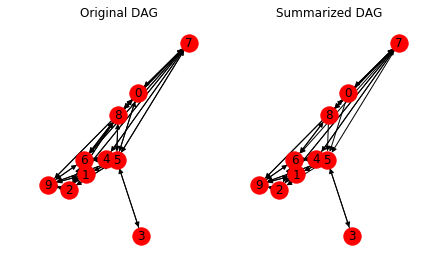

In [9]:
## Plot the Tree's
pos = nx.random_layout(nx.DiGraph(DAG))
plt.figure(1)
plt.subplot(1, 2, 1)
gc.plot_Graph(DAG,pos)
plt.title('Original DAG')
plt.subplot(1, 2, 2)
gc.plot_Graph(Updated_DAG,pos)
plt.title('Summarized DAG')
plt.tight_layout() # Fitting the plot

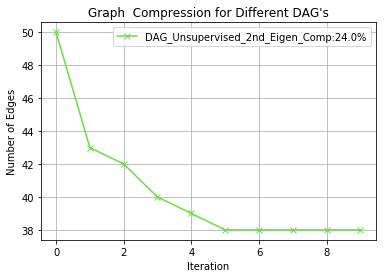

In [10]:
## Plot Number of Edges Reduced
Compression=np.count_nonzero(Updated_DAG)/np.count_nonzero(DAG)
plt.figure(2)
gc.plot_Edge_Reduction(NumberofEdges,"DAG_Unsupervised_2nd_Eigen_Comp:"+str((1-Compression)*100)+'%',mark='x',Color=np.random.random(3))
## Remove Temporary Files Created
os.remove("Dummy_DAG.mat")